In [2]:
from pylab import *
%matplotlib inline

Se utiliza el metodo de Runge Kutta con argumentos, como se vio en clase

In [3]:
def rk4(ec,p_ini,x,args=0,h=0.01):  
    if (x[1]-x[0]) <= 5*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Se define la ecuacion de movimiento de la pelota de masa m = 1, como se vio en clase

In [28]:
def e_mov(r_v,t,fric=0,g=9.8,m=1):
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = 0,-(g/m)
        #print "No use un modelo de friccion"
    else:
        dvx = - fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
        #print "Use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

Aqui se definen las fricciones, que seran los argumentos en el metodo de  Runge Kutta, tal como se vio en clase

In [5]:
def fric_v(v,gamma=0.1): # la fricción con el aire es proporcional a la velocidad.
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y]) 

def fric_v2(v,gamma=0.1): # la fracción es proporcional al cuadrado de la velocidad
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y]) 

Se define la funcion de rebote tal como se vio en clase, con una pequeña modificacion

In [30]:
def rebote(r_v_i,mi_dt):
    dt_busqueda = (mi_dt)/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],fric_v)
    y_med = sol[-1,:]
    while abs(y_izq[1]) > abs(plano): # es esta parte si abs(y_izq[1]) esta por arriba del plano inclinado entra 
        if y_izq[1]*y_med[1] < 0:     # al ciclo, este es el unico cambio que se le hizo a este algoritmo
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t,sol = rk4(e_mov,reinicio,[0,dt_busqueda],fric_v)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])    
    return y_izq

defini una funcion (pendiente) que calcula la pendiente m en base a el aungulo dado
y una funcion (f) que representa el plano inclinado con pendiente m donde rebota la pelota

In [55]:
def pendiente(angulo): # encuentra la pendiente en funcion del angulo dado
    m = -tan((pi/180)*angulo)
    return m 
def f(x,angulo,h):     # encuentra la recta del plano en funcion del angulo, p es la altura inicial
    y=x*pendiente(angulo)+h
    return y

El siguiente algortimo es igual al visto en clase, con un pequeño cambio

para $$ \alpha = 15° $$
y la fricción con el aire  proporcional a la velocidad.

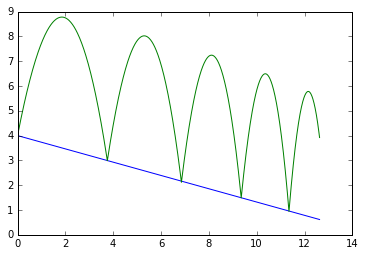

In [61]:
inicio = [0,4,2,10] # las dos primeras entradas corresponden a la posicion inicial de la pelora (x,y)
                    # las ultimas dos estradas corresponde a las componetes de la velocidad incial de la pelota (vx,vy)
a=15 # angulo de inclinacion del plano
h = inicio[1] # altura de la pendiente desde donde se hace el lazamiento
N = 1000 # numero de puntos a calcular dentro de la trayectoria
trayectoria = zeros((N,len(inicio)))
mi_dt = .01
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v) # aqui se escoje la friccion a utilizar
    plano = f(sol_dt[-1,:][0],a,h) # utiliza la funcion de la recta para encontrar el punto donde la pelota rebota
    if sol_dt[-1,:][1] < plano: # si la posicion en y de la pelota es menor a la altura del plano la pelota rebota
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]
plot(trayectoria[:,0],f(trayectoria[:,0],a,h),trayectoria[:,0],trayectoria[:,1],'-') # grafica los punto de la trayectoria 
                                                        # y el plano donde rebota la pelota
show()

para $$ \alpha = 15° $$
y la fricción con el aire  proporcional al cuadrado de la velocidad.

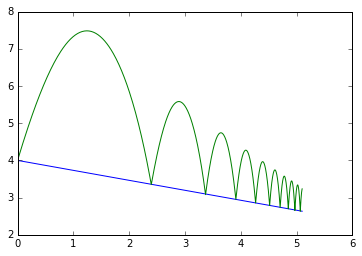

In [63]:
inicio = [0,4,2,10]                   
a=15 
h = inicio[1] 
N = 1000 
trayectoria = zeros((N,len(inicio)))
mi_dt = .01
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v2) 
    plano = f(sol_dt[-1,:][0],a,h) 
    if sol_dt[-1,:][1] < plano: 
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]
plot(trayectoria[:,0],f(trayectoria[:,0],a,h),trayectoria[:,0],trayectoria[:,1],'-') 
                                             
show()

para $$ \alpha = 30° $$
la fricción con el aire  proporcional a la velocidad.

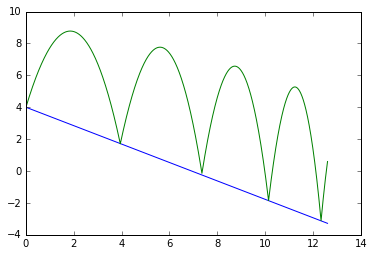

In [64]:
inicio = [0,4,2,10]
a=30
h = inicio[1]
N = 1000
trayectoria = zeros((N,len(inicio)))
mi_dt = .01
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    plano = f(sol_dt[-1,:][0],a,h)
    if sol_dt[-1,:][1] < plano:
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]
plot(trayectoria[:,0],f(trayectoria[:,0],a,h),trayectoria[:,0],trayectoria[:,1],'-')
show()

para $$ \alpha = 30° $$
y la fricción con el aire  proporcional al cuadrado de la velocidad.

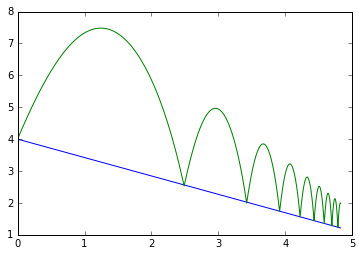

In [65]:
inicio = [0,4,2,10]
a=30
h = inicio[1]
N = 1000
trayectoria = zeros((N,len(inicio)))
mi_dt = .01
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v2)
    plano = f(sol_dt[-1,:][0],a,h)
    if sol_dt[-1,:][1] < plano:
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]
plot(trayectoria[:,0],f(trayectoria[:,0],a,h),trayectoria[:,0],trayectoria[:,1],'-')
show()

para $$ \alpha = 45° $$
la fricción con el aire  proporcional a la velocidad.

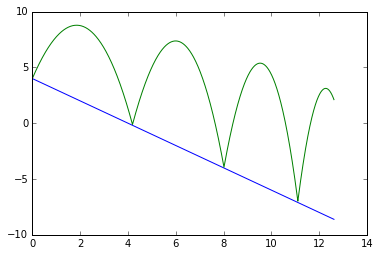

In [66]:
inicio = [0,4,2,10]
a=45
h = inicio[1]
N = 1000
trayectoria = zeros((N,len(inicio)))
mi_dt = .01
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    plano = f(sol_dt[-1,:][0],a,h)
    if sol_dt[-1,:][1] < plano:
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]
plot(trayectoria[:,0],f(trayectoria[:,0],a,h),trayectoria[:,0],trayectoria[:,1],'-')
show()

para $$ \alpha = 45° $$
y la fricción con el aire  proporcional al cuadrado de la velocidad.

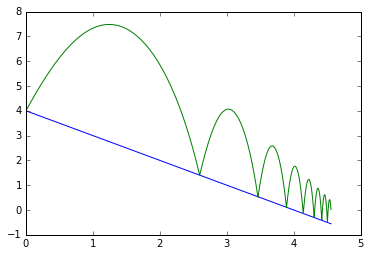

In [67]:
inicio = [0,4,2,10]
a=45
h = inicio[1]
N = 1000
trayectoria = zeros((N,len(inicio)))
mi_dt = .01
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v2)
    plano = f(sol_dt[-1,:][0],a,h)
    if sol_dt[-1,:][1] < plano:
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]
plot(trayectoria[:,0],f(trayectoria[:,0],a,h),trayectoria[:,0],trayectoria[:,1],'-')
show()

ahora la pelota es lanzada con velocidad inicial $$ v_{0x} < 0 $$tal que$$ \tan^{−1} \left( \frac {v_{0y}}{v_{0x}}\right) > α $$

Con la fricción con el aire proporcional a la velocidad.

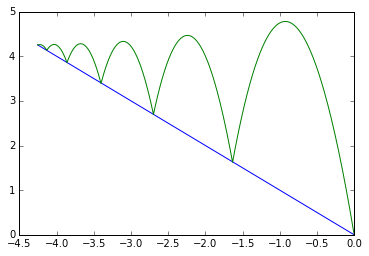

In [72]:
inicio = [0,0,-1,10] # voy = 10 y vox = -1 cumplen con la condicion , el punto incial de lanzamiento es (0,0)
a=45
h = inicio[1]
N = 1000
trayectoria = zeros((N,len(inicio)))
mi_dt = .01
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    plano = f(sol_dt[-1,:][0],a,h)
    if sol_dt[-1,:][1] < plano:
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]
plot(trayectoria[:,0],f(trayectoria[:,0],a,h),trayectoria[:,0],trayectoria[:,1],'-')
show()

Con la fricción con el aire  proporcional al cuadrado de la velocidad.

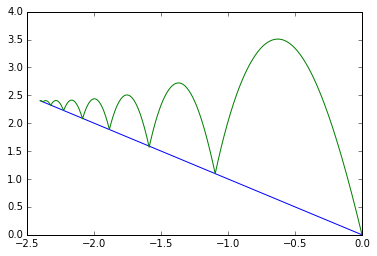

In [71]:
inicio = [0,0,-1,10] # voy = 10 y vox = -1 cumplen con la condicion , el punto incial de lanzamiento es (0,0)
a=45
h = inicio[1]
N = 1000
trayectoria = zeros((N,len(inicio)))
mi_dt = .01
trayectoria[0,:] = array(inicio)
for i in range(N-1):
    t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v2)
    plano = f(sol_dt[-1,:][0],a,h)
    if sol_dt[-1,:][1] < plano:
        punto = rebote(trayectoria[i,:],mi_dt)
        trayectoria[i+1,:] = punto
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]
plot(trayectoria[:,0],f(trayectoria[:,0],a,h),trayectoria[:,0],trayectoria[:,1],'-')
show()

# la pelota rebota en en dirección negativa al eje x y con cada rebote pierde mucha mas altura que en los casos anteriores 